### Step 0: Downloading dataset

The following code will help you in downloading the dataset stored in you Azure Machine Learning Service Workspace:

**NOTE**: We recommend storing your *Azure Credentials in Secrets, Azure Key Vault, or Environment Variables*

*You only need to run it once**

In [1]:
import os
import joblib

SUBSCRIPTION_ID = os.getenv('7e48a1e8-8d3e-4e00-8bc0-098c43f5ace7')
RESOURCE_GROUP = os.getenv('rgDS_SecurityAndRiskWorkshop')
WORKSPACENAME = os.getenv('rgDS_SecurityAndRiskWorkshop')

### Step 1: Importing libraries

We typically recommend importing libraries beforehand. That will help you identify some dependency issues before even loading the data.

In [2]:
import pandas as pd
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.covariance import EmpiricalCovariance, MinCovDet

from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ExplainableBoostingClassifier

import statistics
import hdbscan

ModuleNotFoundError: No module named 'plotly'

---------------------------------------------

### Step 2: Reading downloaded data into dataframe

Typically, the file is going to be stored in the local file system that you are using.

In [3]:
df = pd.read_csv("insurance_claims_data.csv")
target_variable = 'fraud_reported'

### Step 3: Using info() method to understand the data schema.

With this you will understand number of missing samples and the type of each field.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

### Step 4: Formatting target variable into Boolean

This will help in the model creation and evaluation process

In [5]:
df[target_variable] = [1 if i=='Y' else 0 for i in df[target_variable]]
df['incident_hour_of_the_day'] = pd.Categorical(df['incident_hour_of_the_day'])

### Step 5: Data Profiling (Unidimensional)

We are going understand the main characteristics of the different features and the target an an unidimensional way. 

In [6]:
#pandas_profiling.ProfileReport(df, explorative=True)

### Step 6: Data Profiling (With reference to Target)

In this case, since our target is binary, we recommend the following types of visualizations:
- **For categorial independent variables**: We recommend visualizing the percentage of the target class vs. each class of the independent variable.
- **For continuous independent variables**: We recommend splitting the data in bins visualizing the percentage of the target class vs. each bin in the independent variable. We also recommend using scatterplots in cases where dependent variable is continuous.

#### 6.1. Percentage of fraud by Gender. | Cat

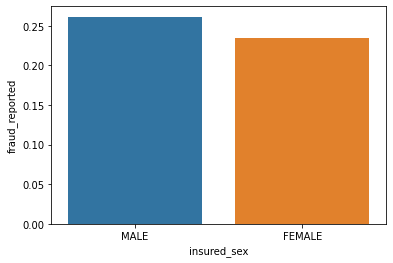

In [7]:
temp = df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_sex',  y = 'fraud_reported', data=temp)

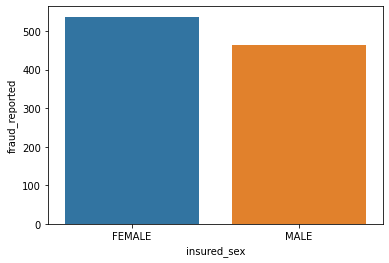

In [8]:
temp = df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_sex',  y = 'fraud_reported', data=temp)

#### 6.2. Percentage of fraud by Auto Model. | Cat

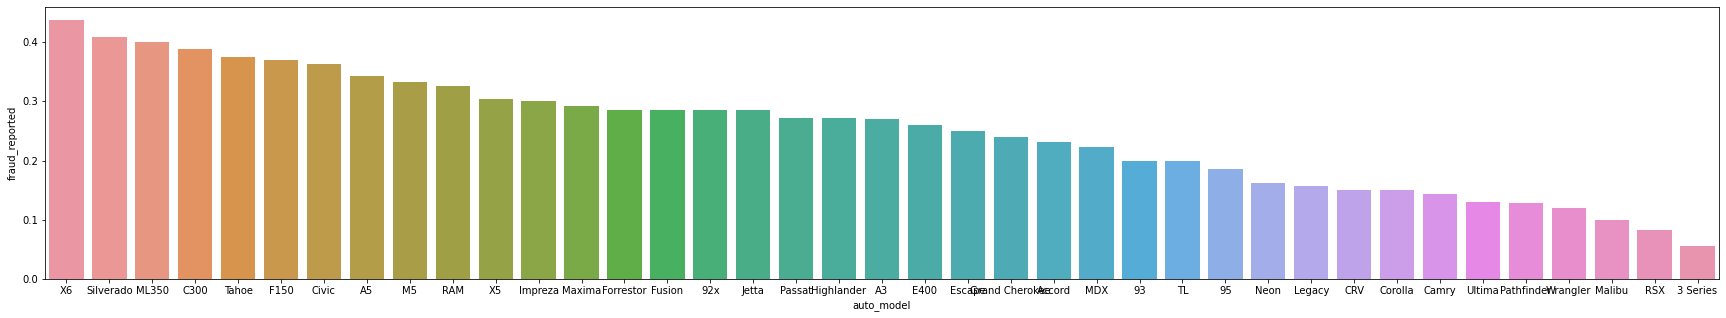

In [9]:
plt.figure(figsize=(30,5))
temp = df[['auto_model','fraud_reported']].groupby(['auto_model'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='auto_model',  y = 'fraud_reported', data=temp)

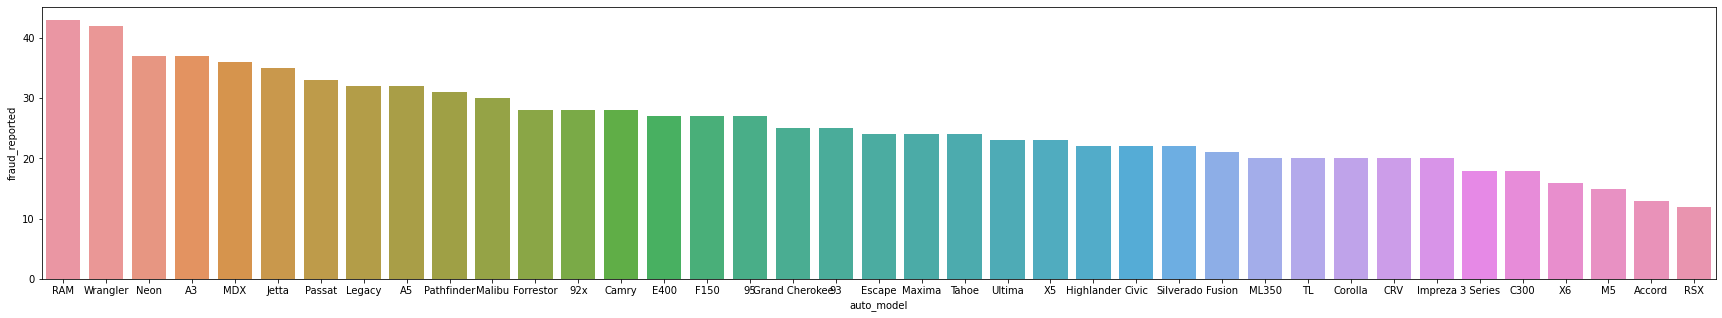

In [10]:
plt.figure(figsize=(30,5))
temp = df[['auto_model','fraud_reported']].groupby(['auto_model'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='auto_model',  y = 'fraud_reported', data=temp)

#### 6.3. Percentage of fraud by Auto Make. | Cat

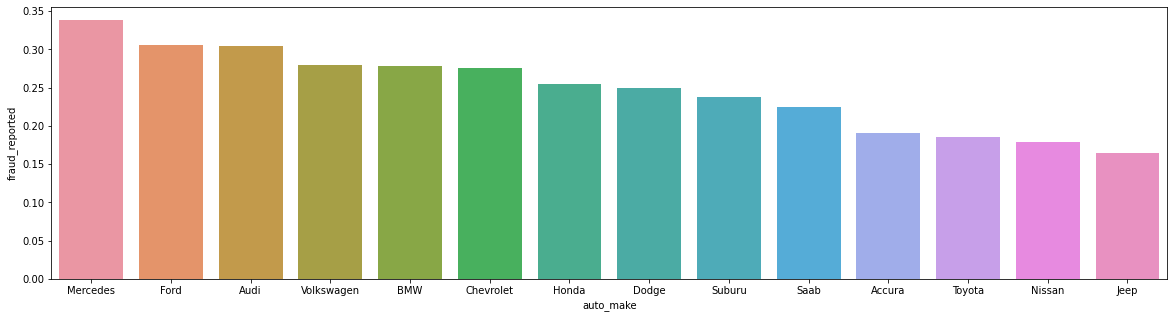

In [11]:
plt.figure(figsize=(20,5))
temp = df[['auto_make','fraud_reported']].groupby(['auto_make'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='auto_make',  y = 'fraud_reported', data=temp)

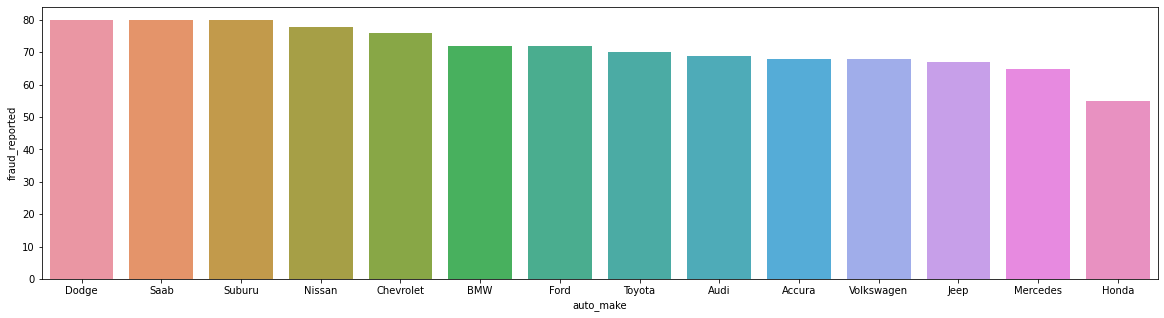

In [12]:
plt.figure(figsize=(20,5))
temp = df[['auto_make','fraud_reported']].groupby(['auto_make'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='auto_make',  y = 'fraud_reported', data=temp)

#### 6.4. Percentage of fraud by Police Report Available. | Cat

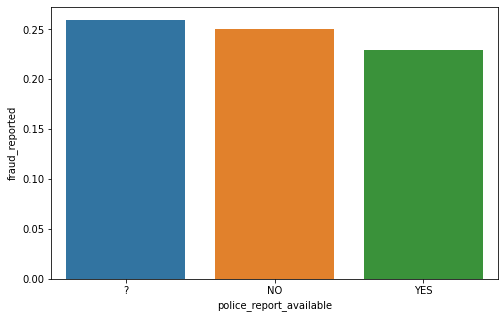

In [13]:
plt.figure(figsize=(8,5))
temp = df[['police_report_available','fraud_reported']].groupby(['police_report_available'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='police_report_available',  y = 'fraud_reported', data=temp)

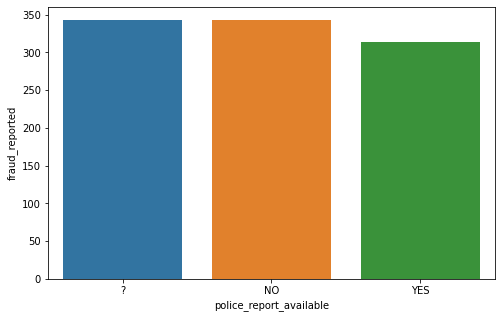

In [14]:
plt.figure(figsize=(8,5))
temp = df[['police_report_available','fraud_reported']].groupby(['police_report_available'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='police_report_available',  y = 'fraud_reported', data=temp)

#### 6.5. Percentage of fraud by Property Damage. | Cat

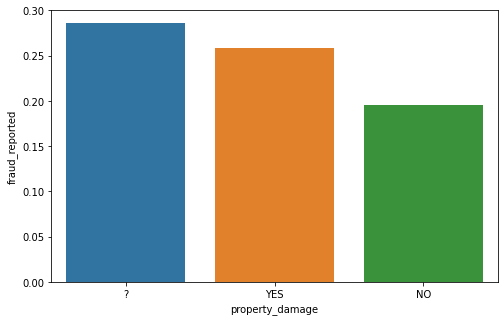

In [15]:
plt.figure(figsize=(8,5))
temp = df[['property_damage','fraud_reported']].groupby(['property_damage'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='property_damage',  y = 'fraud_reported', data=temp)

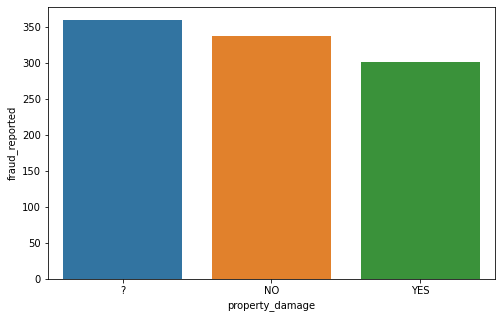

In [16]:
plt.figure(figsize=(8,5))
temp = df[['property_damage','fraud_reported']].groupby(['property_damage'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='property_damage',  y = 'fraud_reported', data=temp)

#### 6.6. Percentage of fraud by Incident City. | Cat

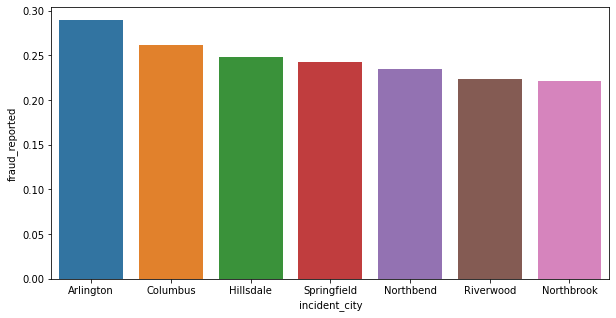

In [17]:
plt.figure(figsize=(10,5))
temp = df[['incident_city','fraud_reported']].groupby(['incident_city'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_city',  y = 'fraud_reported', data=temp)

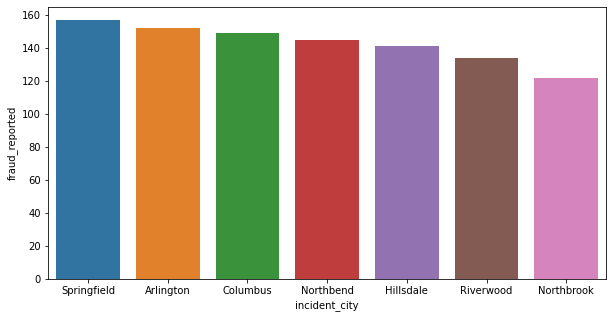

In [18]:
plt.figure(figsize=(10,5))
temp = df[['incident_city','fraud_reported']].groupby(['incident_city'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_city',  y = 'fraud_reported', data=temp)

#### 6.7. Percentage of fraud by Incident City. | Cat

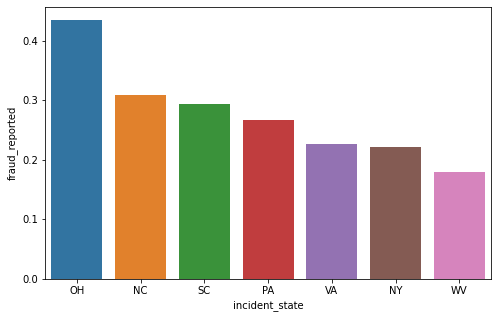

In [19]:
plt.figure(figsize=(8,5))
temp = df[['incident_state','fraud_reported']].groupby(['incident_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_state',  y = 'fraud_reported', data=temp)

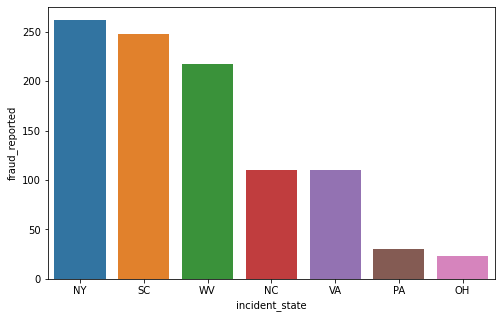

In [20]:
plt.figure(figsize=(8,5))
temp = df[['incident_state','fraud_reported']].groupby(['incident_state'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_state',  y = 'fraud_reported', data=temp)

#### 6.8. Percentage of fraud by Authorities contacted. | Cat

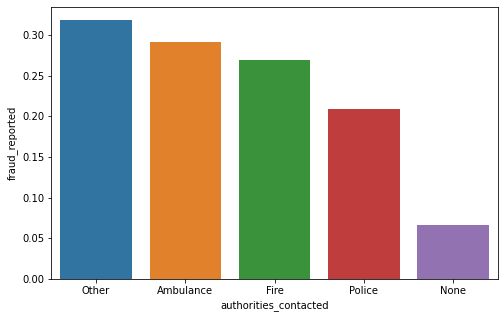

In [21]:
plt.figure(figsize=(8,5))
temp = df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='authorities_contacted',  y = 'fraud_reported', data=temp)

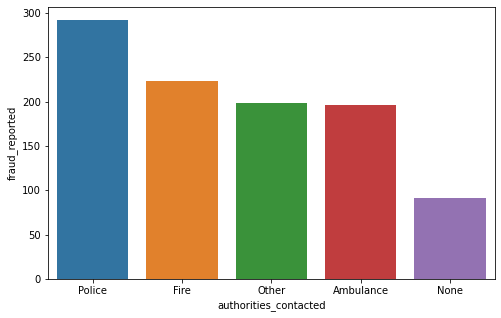

In [22]:
plt.figure(figsize=(8,5))
temp = df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='authorities_contacted',  y = 'fraud_reported', data=temp)

#### 6.9. Percentage of fraud by incident severity. | Cat

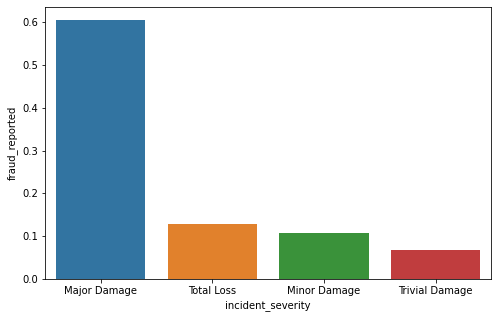

In [23]:
plt.figure(figsize=(8,5))
temp = df[['incident_severity','fraud_reported']].groupby(['incident_severity'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_severity',  y = 'fraud_reported', data=temp)

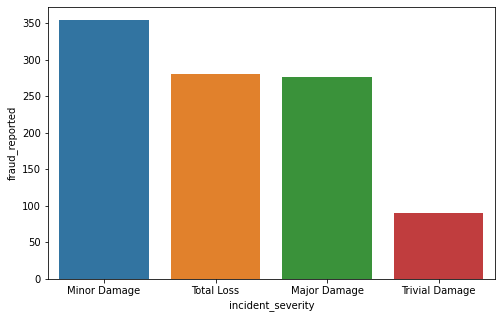

In [24]:
plt.figure(figsize=(8,5))
temp = df[['incident_severity','fraud_reported']].groupby(['incident_severity'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_severity',  y = 'fraud_reported', data=temp)

#### 6.10. Percentage of fraud by Colision Type. | Cat

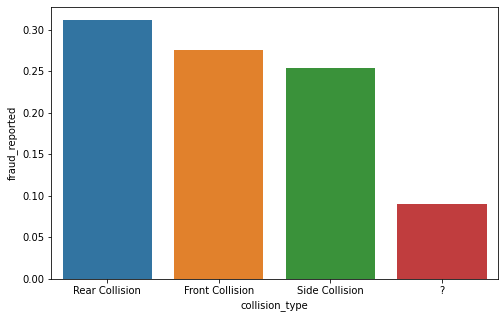

In [25]:
plt.figure(figsize=(8,5))
temp = df[['collision_type','fraud_reported']].groupby(['collision_type'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='collision_type',  y = 'fraud_reported', data=temp)

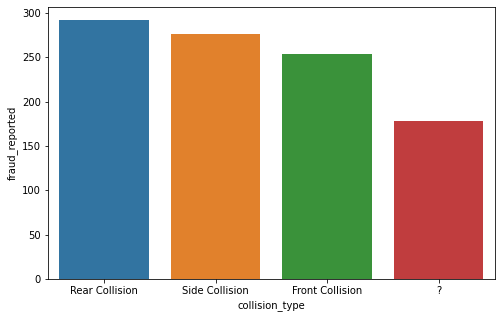

In [26]:
plt.figure(figsize=(8,5))
temp = df[['collision_type','fraud_reported']].groupby(['collision_type'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='collision_type',  y = 'fraud_reported', data=temp)

#### 6.11. Percentage of fraud by Incident Type. | Cat

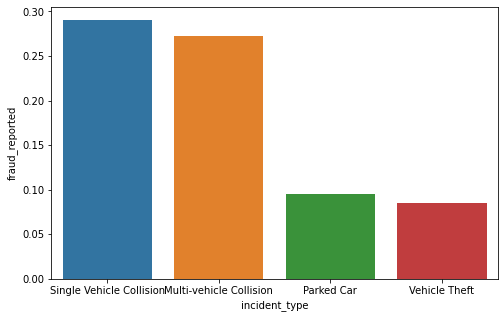

In [27]:
plt.figure(figsize=(8,5))
temp = df[['incident_type','fraud_reported']].groupby(['incident_type'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_type',  y = 'fraud_reported', data=temp)

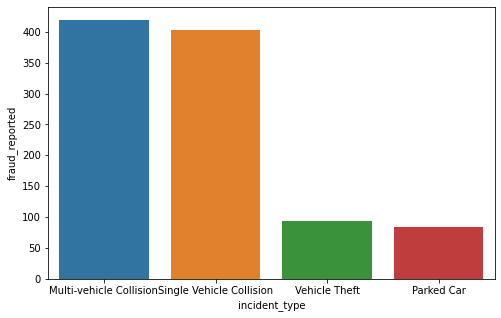

In [28]:
plt.figure(figsize=(8,5))
temp = df[['incident_type','fraud_reported']].groupby(['incident_type'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_type',  y = 'fraud_reported', data=temp)

#### 6.12. Percentage of fraud by Incident Day and Month. | Cat

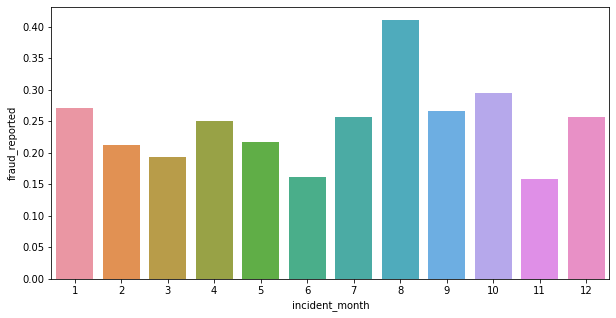

In [29]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# extracting days and month from date
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

plt.figure(figsize=(10,5))
temp = df[['incident_month','fraud_reported']].groupby(['incident_month'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_month',  y = 'fraud_reported', data=temp)

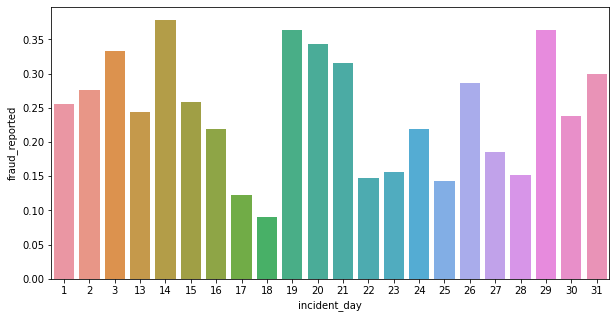

In [30]:
plt.figure(figsize=(10,5))
temp = df[['incident_day','fraud_reported']].groupby(['incident_day'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='incident_day',  y = 'fraud_reported', data=temp)

#### 6.13. Percentage of fraud by Insured Relationship. | Cat

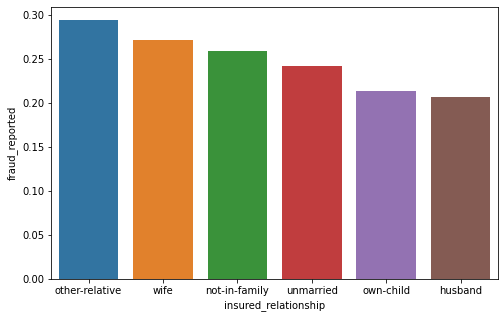

In [31]:
plt.figure(figsize=(8,5))
temp = df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_relationship',  y = 'fraud_reported', data=temp)

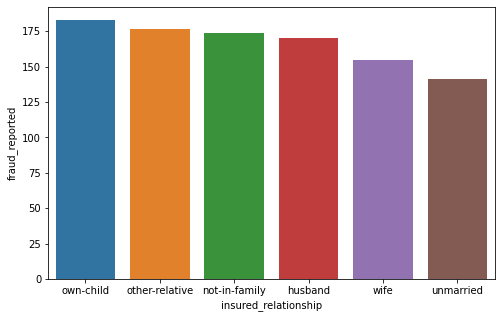

In [32]:
plt.figure(figsize=(8,5))
temp = df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_relationship',  y = 'fraud_reported', data=temp)

#### 6.14. Percentage of fraud by Insured Hobbies. | Cat

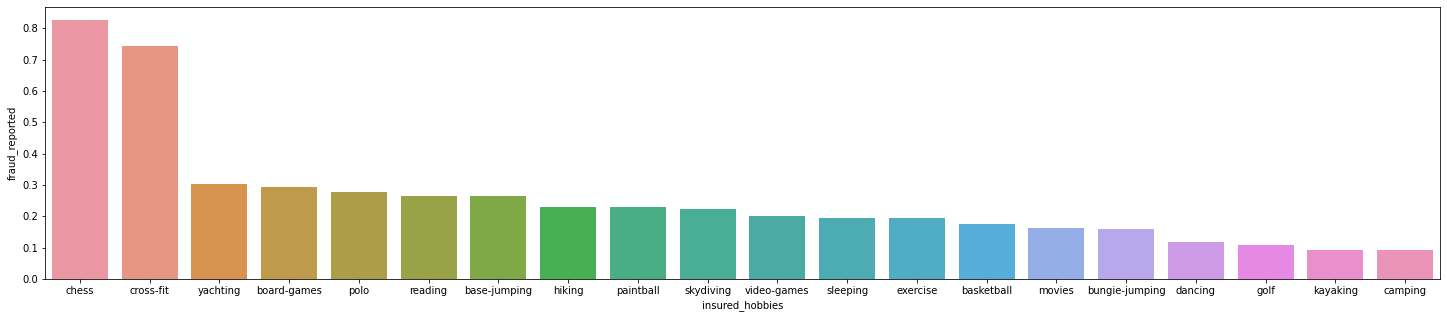

In [33]:
plt.figure(figsize=(25,5))
temp = df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_hobbies',  y = 'fraud_reported', data=temp)

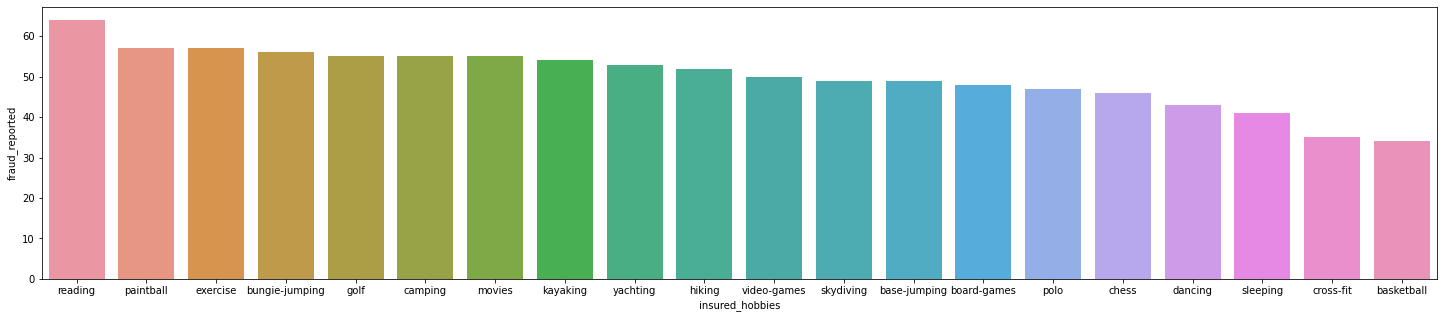

In [34]:
plt.figure(figsize=(25,5))
temp = df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_hobbies',  y = 'fraud_reported', data=temp)

#### 6.15. Percentage of fraud by Insured Occupation. | Cat

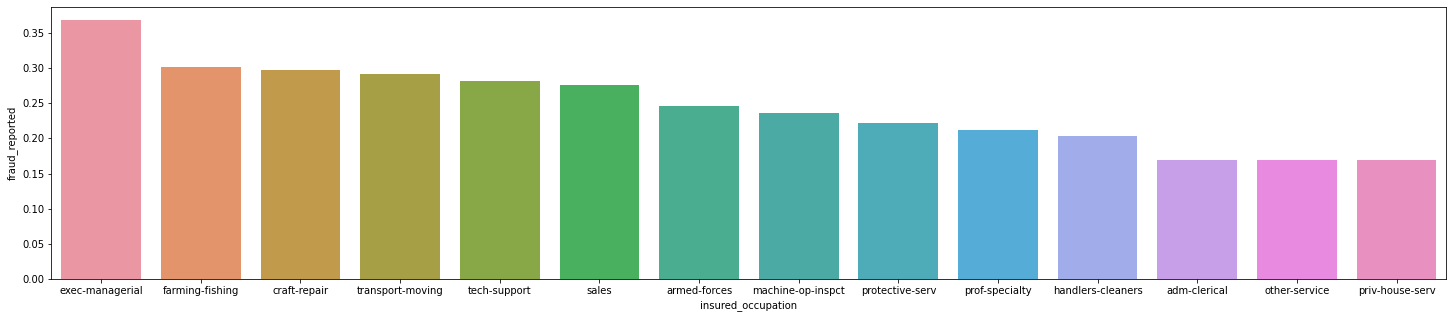

In [35]:
plt.figure(figsize=(25,5))
temp = df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_occupation',  y = 'fraud_reported', data=temp)

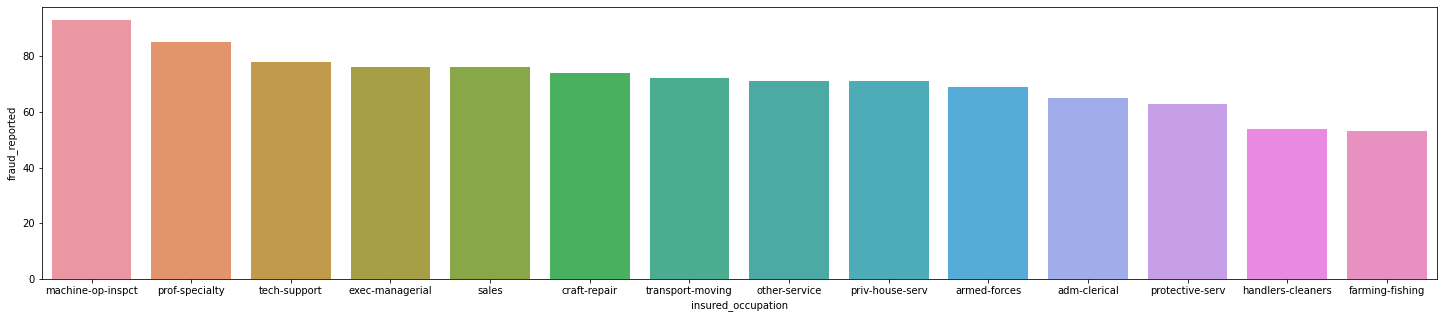

In [36]:
plt.figure(figsize=(25,5))
temp = df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_occupation',  y = 'fraud_reported', data=temp)

#### 6.16. Percentage of fraud by Insured Education Level. | Cat

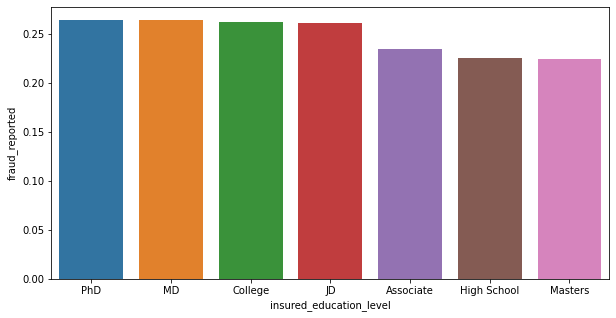

In [37]:
plt.figure(figsize=(10,5))
temp = df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_education_level',  y = 'fraud_reported', data=temp)

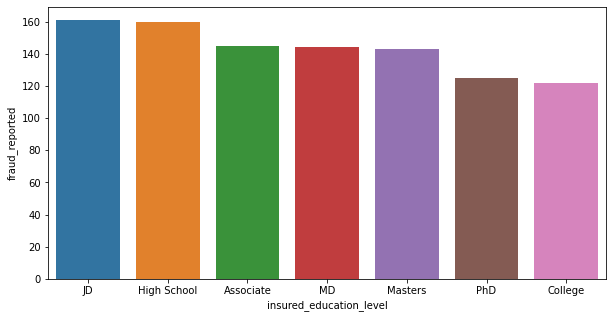

In [38]:
plt.figure(figsize=(10,5))
temp = df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='insured_education_level',  y = 'fraud_reported', data=temp)

#### 6.17. Percentage of fraud by policy CSL. | Cat

**CSL** stands for Combined Single Limit

**CSL** is a single number that describes the predetermined limit for the combined total of the **Bodily Injury 
Liability** Coverage and **Property Damage Liability** coverage per occurrence or accident.

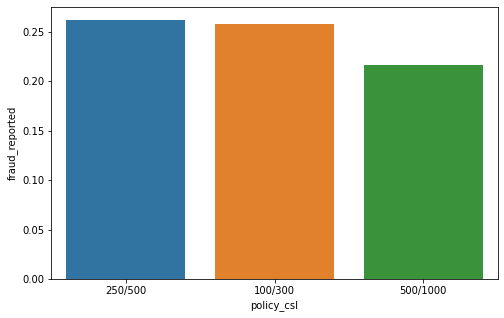

In [39]:
plt.figure(figsize=(8,5))
temp = df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='policy_csl',  y = 'fraud_reported', data=temp)

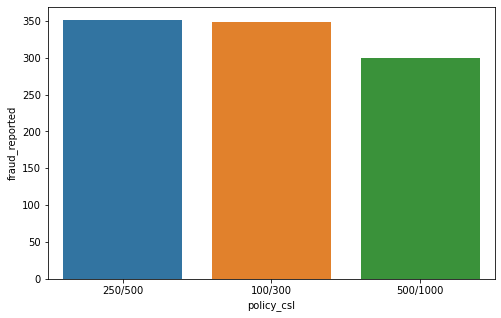

In [40]:
plt.figure(figsize=(8,5))
temp = df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='policy_csl',  y = 'fraud_reported', data=temp)

#### 6.18. Percentage of fraud vs. Auto Year | Cat

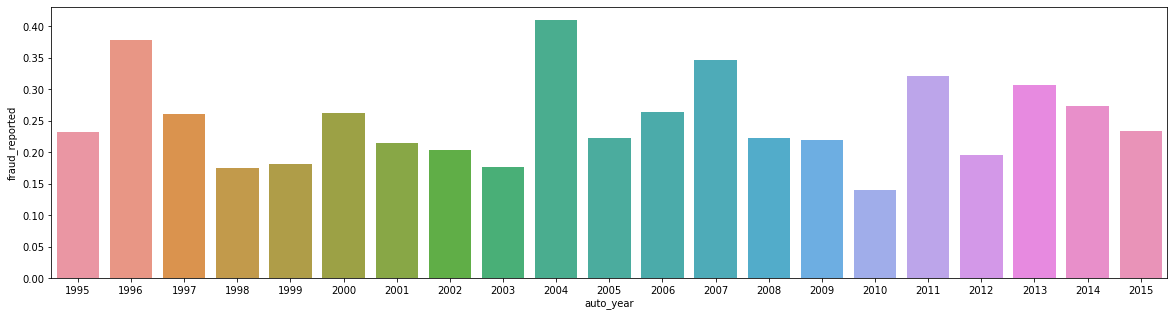

In [41]:
plt.figure(figsize=(20,5))
temp = df[['auto_year','fraud_reported']].groupby(['auto_year'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='auto_year',  y = 'fraud_reported', data=temp)

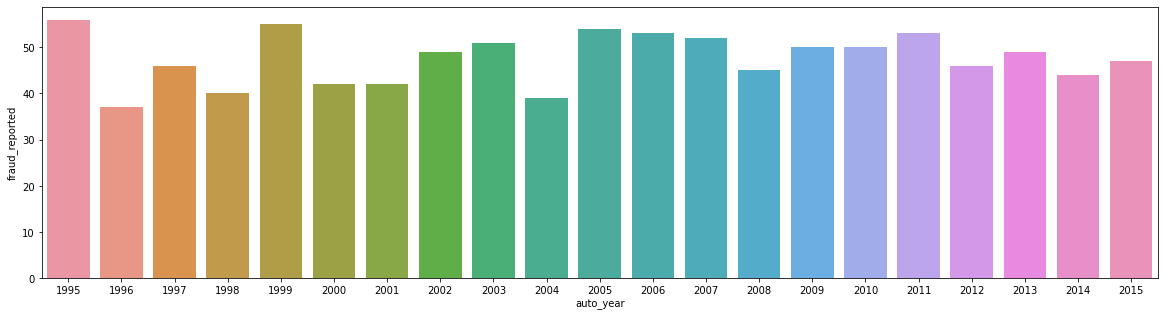

In [42]:
plt.figure(figsize=(20,5))
temp = df[['auto_year','fraud_reported']].groupby(['auto_year'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='auto_year',  y = 'fraud_reported', data=temp)

#### 6.19. Approach using the **Interpret** library from Microsoft Research.

More information [Here.](https://github.com/interpretml/interpret)

In [43]:
features_ignore_initial = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'insured_zip', 'auto_model', 'fraud_reported']
X = df.drop(features_ignore_initial, axis=1)
y = df[target_variable].values

from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X, y, name = 'Train Data')
show(hist)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/interpret/provider/visualize.py:37: UserWarning:

Cloud environment detected (['azureml_vm', 'ipython-zmq', 'ipython']): viz integration is still experimental.



### Step 7:  Insights from Data Profiling

It is important to document all the insights generated during the **Data Profiling** step. They can give you an early notice of possible **Biases** in the dataset and also uncover some important characteristics of the dataset that should be taken into account during **Feature Engineering** step in the **Model Creation** phase.

In the **Data Profiling** step, we identify the following characteristics to consider:

- **policy_bind_date** has too many different values: Each year has 365 days, thus we might want to find a different way to capture this field.
- **incident_date** has too many different values: Each year has 365 days, thus we might want to find a different way to capture this field.
- **age_months_as_customer** and **age** are highly correlated: this can be cause because there is a minimum age to request a driver's license.
- **vehicle_claim** and **total_claim_ammount** are highly correlated: this happens because there is a good proportion of accidents that do not involve other amounts such as **property_claim**.
- **auto_model** is highly correlated to **auto_make**: this makes sense, as we are working only with a limited subset of the data and we do not have the full population of the possible vehicles file for claims after an accident. In order to help the model generalize we might want to recode this variable and create something such as cost of vehicle (or price range) or limit the implementation of the model to the ones in this dataset.
- **policy_number** is unique, always has unique values: there is nothing we can do here, we might want to take it out as this will not provide any additional information.
- **auto_model** and **auto_make** are highly correlated: it makes sense as car manufacturers typically name their cars differently. We might want to keep them for now just in case we want to recode them and use the new features in our Machine Learning Model.
- We have a limited number of unique values **auto_model**: we do not have the full population of the possible vehicles file for claims after an accident. In order to help the model generalize we might want to recode this variable and create something such as cost of vehicle (or price range) or limit the implementation of the model to the ones in this dataset.
- We have a limited number of **auto_make** (manufacturers): same comment as in **auto_model**, we might want to remove it after we create the recoded new variable/s.
- **police_report_available** has **35% of values as "?"**: in this case, we will need to go back to the business and understand why this is happens in order to strategize a way to recode this variable.
- **property_damage** has around **36% if values as "?"**: in this case, we will need to go back to the business and understand why this is happens in order to strategize a way to recode this variable.
- **collision_type** has a around **18% of the values as "?"**: in this case, we will need to go back to the business and understand why this is happens in order to strategize a way to recode this variable.
- **incident_location** is too granular to provide any information: having the exact information where the accident happened might not be helpful in this subset of the data. Probably if we have more information, we can identify any trend base on this granularity level of location.
- **auto_year**: we might not have enough information to make any conclusions from this variable. 
- **total_claim_amount** has a Bimodal distribution: we might want to split it into two variables.  

### Step 8:  Outlier and Extreme values identification

#### Step 8.1: Types of outliers and extreme values:

Pretty much all datasets contain outliers or extreme values, we should be very aware of them, the can difficult the capacity of generalization of Machine Learning models. 

Most common causes of outliers on a dataset:

- **Data entry** errors: human errors.
- **Measurement** errors: instrument errors.
- **Experimental** errors: data extraction or experiment planning/executing errors.
- **Intentional**: dummy outliers made to test detection methods.
- **Data processing** errors: data manipulation or data set unintended mutations.
- **Sampling** errors: extracting or mixing data from wrong or various sources.
- **Natural**: not an error, novelties in data. ***We might want to keep these*** as the can contain important information on the data.

In the process of producing, collecting, processing and analyzing data, outliers can come from many sources and hide in many dimensions. Those that are not a product of an error are called **novelties.**


[More detailed information can be found here.](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)

#### Step 8.2: Approaches to outlier and extreme values identification:

There are two general categories of approached for **Outlier Detection**:
- **Parametric** approaches: these assume that the data has some underlying distribution such as normal distribution.
- **Nonparametric** approaches: there is no requirements on the underlying distribution.

Additionally, you can conduct your **Outlier Detection** in any number of features:
- You can use a **Single** feature.
- Or you can use a **Subset** of features.


There are virtually infinite approaches (and combination) that help in the outlier identification process. Following you will find some of the approaches that we use

- **Heuristics**: because experience or because observations with certain (pre-defined) characteristics are always threated differently from the customers they sometimes market to either exclude them from the process or to specifically observe the behavior of the models for them.
- **Z-Score or Extreme Value Analysis (EVA)**: parametric | [Theory (EVA)](https://www.sciencedirect.com/science/article/pii/S0963869517300488) | [Python Implementation (EVA)](https://github.com/georgebv/pyextremes)
- **Isolation Forests**: [Intuition and Python Implementation](http://www.extended-cognition.com/2018/11/15/multivariate-outlier-detection-with-isolation-forests/)
- **Proximity Based Models with or without PCA:** [Theory PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) | [Theory Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) | [Theory Mahalanobis Distance](https://nirpyresearch.com/detecting-outliers-using-mahalanobis-distance-pca-python/) | [Python Implementation](https://nirpyresearch.com/detecting-outliers-using-mahalanobis-distance-pca-python/)
- **High Dimensional Outlier Detection Methods** (high dimensional sparse data): [Theory HiCS](https://www.ipd.kit.edu/mitarbeiter/muellere/publications/ICDE2012.pdf) | [Why to use HiCS in highly dimensional spaces](https://members.loria.fr/MOBerger/Enseignement/Master2/Exposes/beyer.pdf) | [Python Implementation](https://github.com/KDD-OpenSource/fexum-hics)


#### Step 8.3: Identifying Outliers and Extreme Values

We recommend the identification of both, Extreme Values for determined **single features** and Extreme values for a **subset of features**. For this project, we are going to do both:

#### 8.3.1. Identifying Outliers and Extreme values for single features:

In this case, as a results a combination the insights generated in during the **Data Profiling** process and **business decisions** we are going to focus on identifying outliers for **total_claim_amount**:

**Lets start by plotting the distribution:**

In [44]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['total_claim_amount'].iplot(
    mean = 'True',
    kind='hist',
    bins=100,
    xTitle='Total Claim Amount',
    linecolor='black',
    yTitle='count',
    colorscale = 'greens',
    title='Histogram of Sale Price')

As we can see, this variable has a bimodal distribution, so we are going to split it into two datasets and then conduct the outlier analysis.

**Distribution A (<15K)**:

In this case we are not going to identify any outliers as the smallest value correspond to a minor, parking accident and the upper threshold is still smaller than the next cluster partition.

In [45]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

less_15k = df['total_claim_amount'][df['total_claim_amount']<15000]
less_15k.iplot(
    mean = 'True',
    kind='hist',
    bins=100,
    xTitle='Total Claim Amount',
    linecolor='black',
    yTitle='count',
    colorscale = 'greens',
    title='Histogram of Sale Price')

**Distribution A (>20K)**:

In this case we are not going to identify any outliers as the smallest values as we already analyzed them in the previous histogram. Now we are going to focus on the upper side of this distribution.

In [46]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

more_20k = df['total_claim_amount'][df['total_claim_amount']>20000]
more_20k.iplot(
    mean = 'True',
    kind='hist',
    bins=100,
    xTitle='Total Claim Amount',
    linecolor='black',
    yTitle='count',
    colorscale = 'blues',
    title='Histogram of Sale Price')

#### Calculating Standard Deviation of upper thresholds

In [47]:
more_20k_std = statistics.stdev(more_20k)
more_20k_mean = statistics.mean(more_20k)

upper_threshold_2_5 = more_20k_mean+(2.5*more_20k_std)
print("- Upper Threshold with 2.5 stds: ", int(upper_threshold_2_5))

upper_threshold_3_5 = more_20k_mean+(3.5*more_20k_std)
print("- Upper Threshold with 3.5 stds: ", int(upper_threshold_3_5))

- Upper Threshold with 2.5 stds:  102818
- Upper Threshold with 3.5 stds:  118696


We can see that there a no values above 3.5 Standard deviations.

#### Assigning classifications into variables on the original DataFrame

We do this because we want to generate some exploratory Data Analysis with those variables later:

In [48]:
df['total_claim_amount_15k'] = df['total_claim_amount'].apply(lambda x: 1 if x<15000 else 0)
print("- Total samples smaller than 15k:", int(sum(df['total_claim_amount_15k'])))

df['total_claim_amount_2_5_std'] = df['total_claim_amount'].apply(lambda x: 1 if x<upper_threshold_2_5 else 0)
print("- Total samples with more than than 2.5std:", int(len(df) - sum(df['total_claim_amount_2_5_std'])))

df['total_claim_amount_3_5_std'] = df['total_claim_amount'].apply(lambda x: 1 if x<upper_threshold_3_5 else 0)
print("- Total samples with more than than 3.5std:", int(len(df) - sum(df['total_claim_amount_3_5_std'])))

- Total samples smaller than 15k: 178
- Total samples with more than than 2.5std: 9
- Total samples with more than than 3.5std: 0


#### Percentage of fraud by by total_amount category <15k. | Cat

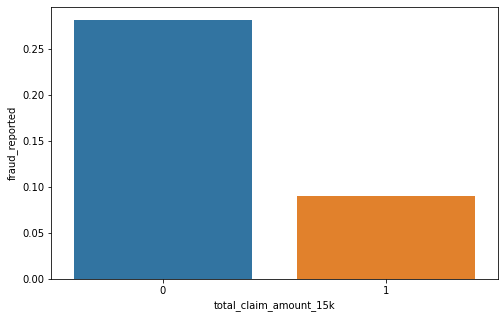

In [49]:
plt.figure(figsize=(8,5))
temp = df[['total_claim_amount_15k','fraud_reported']].groupby(['total_claim_amount_15k'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='total_claim_amount_15k',  y = 'fraud_reported', data=temp)

#### Percentage of fraud by by total_amount category <15k. | Cat

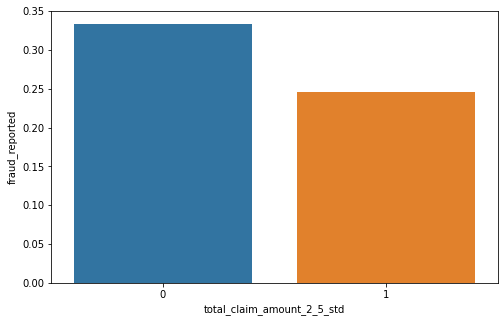

In [50]:
plt.figure(figsize=(8,5))
temp = df[['total_claim_amount_2_5_std','fraud_reported']].groupby(['total_claim_amount_2_5_std'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='total_claim_amount_2_5_std',  y = 'fraud_reported', data=temp)

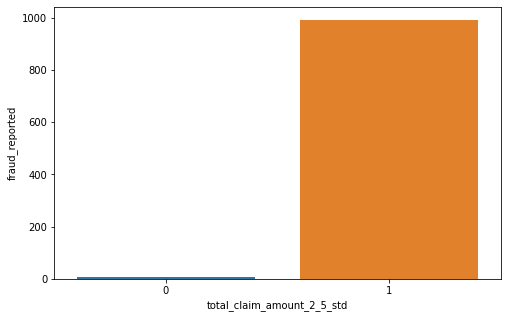

In [51]:
plt.figure(figsize=(8,5))
temp = df[['total_claim_amount_2_5_std','fraud_reported']].groupby(['total_claim_amount_2_5_std'], as_index = False).count().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='total_claim_amount_2_5_std',  y = 'fraud_reported', data=temp)

#### 8.3.1. Identifying Outliers and Extreme values for a subset of the features:

In the **Data Profiling** process, we identified some variables, that we should not use here. 
* policy_number
* policy_bind_date
* incident_date
* incident_location
* auto_model

Additionally, we are going to ignore:

* fraud_reported
* total_claim_amount_15k
* total_claim_amount_2_5_std
* total_claim_amount_3_5_std


In [52]:
features_ignore_initial_pca = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_model', 'fraud_reported', 'total_claim_amount_15k', 'total_claim_amount_2_5_std', 'total_claim_amount_3_5_std']

In [53]:
df2 = df.drop(features_ignore_initial, errors ='ignore', axis = 1)

We will also need to tokenize the **categorial variables**.

In [54]:
categorial = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make']
df2 = pd.get_dummies(df2.drop('fraud_reported', errors ='ignore', axis = 1))

Now we will use **PCA**:

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Define the PCA object
pca = PCA(svd_solver = 'full', random_state=80)
# Run PCA on scaled data and obtain the scores array
T = pca.fit_transform(StandardScaler().fit_transform(df2))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



Then we will use [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html):

- Number of possible outliers: 3
- Number of possible outliers: 15


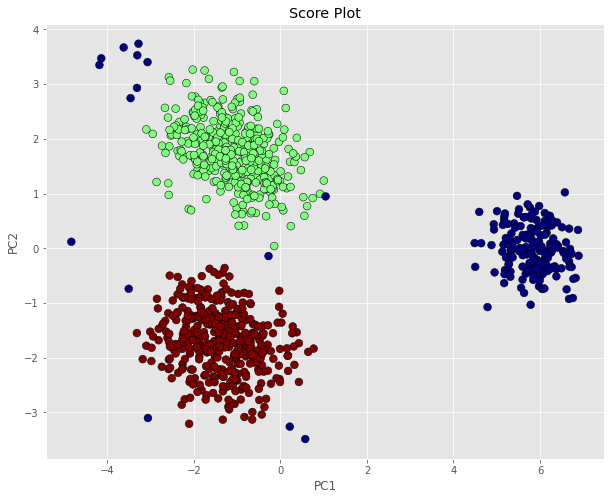

In [56]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
clusterer.fit(T[:,:2])

print("- Number of possible outliers:", max(clusterer.labels_)+1)
print("- Number of possible outliers:", sum(clusterer.labels_ ==-1))

colors = [plt.cm.jet(float(i)/max(clusterer.labels_)) for i in clusterer.labels_]
fig = plt.figure(figsize=(10,8))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')

In [57]:
df['hdbscan_cluster'] = clusterer.labels_

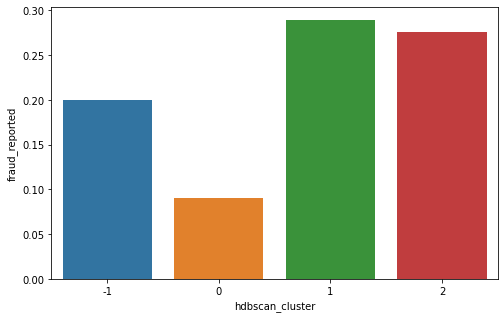

In [58]:
plt.figure(figsize=(8,5))
temp = df[['hdbscan_cluster','fraud_reported']].groupby(['hdbscan_cluster'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
ax = sns.barplot(x='hdbscan_cluster',  y = 'fraud_reported', data=temp)

In [59]:
features_ignore_initial = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location','insured_zip', 'auto_model', 'total_claim_amount_15k', 'total_claim_amount_2_5_std', 'total_claim_amount_3_5_std','hdbscan_cluster','insured_zip']

#### Step 8.3: What can be done with extreme values?

There are virtually infinite ways to deal with extreme values. However, one common practice is to research and understand the causes of these in order to determine what do with them. Furthermore, following you will find some of the most common practices:

- Use this engine in order to re-direct this datapoints to other processes: **human-in-the-loop** or **heuristics-based** approaches.
- If the cause of those extreme values can be identified and explained (they have **natural** causes), they can be treated by adding features that capture their behavior and/or adding more samples to this dataset.
- In cases where those extreme values were generated because of **non-natural** causes (errors in data pipeline, measurement errors), Data Scientists typically remove those extreme values from the data. 

---------------------------------------------



### Step 9:  Working on data split for baseline model

In this step we are not going to do any **model, feature or hyperparameter selection**. Here we just want to have a quick model in order to understand limitations with the dataset and have a ballpark idea on how well the model can be.

For this step, we typically recommend having as less **Feature Engineering** as possible, as we want to understand the behavior of the **raw** features. We also recommend using the simplest algorithms available, as we do not want to spend too much time in this process. We typically recommend using simple linear models such as **Linear Regressions** or **Logistic Regressions**.

#### 9.1. Separating features and targets

In this step we do not do anything too special, here we are just separating our **target** from our **features** and ignoring some of the features that cannot be put into the model without preprocessing (**dates, customer_id, etc...**)

In [60]:
df2 = df.drop(features_ignore_initial,errors='ignore', axis = 1)
X = df2.drop(target_variable, axis=1)
y = df2[target_variable].values

#### 9.2. Defining Split between test/train

Even if it seems trivial, this is one of the most important steps in the Data Science process, as an error here can mislead and/or make this process more difficult to you, as we can introduce **data leakage** and **underrepresentation** on the training set. These are some of the thinks that we recommend considering:

- For **categorical** dependent targets, we recommend using stratified splits, as we want to have a similar distribution on both the training and testing datasets.
- When you are working with **Time Series**, we recommend doing the splits based on date **cut-off**, as samples of the same period tend to have similar behaviors and in real life we will never have future data to train the models. Thus, the objective of this kind of models is to predict **future** behavior with data from the **past**.
- For **Non-Time Series** cases, even though in most cases not involving big data, we do splits based in percentages, this is not always applicable. In cases where you have **2MM observations**, for example, the **20% represents 400k observations** (that seems like a lot). In these cases, you might want to analyze what number of observations make sense in order to do a correct model selection.



#### 9.3. Splitting train/test

In [61]:
#X=pd.get_dummies(X.drop('fraud_reported', errors ='ignore', axis = 1))
t_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=19, stratify=y)

In [62]:
X_train.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
214                 142   33           IN    100/300               2000   
633                 142   29           OH    100/300               2000   
807                 186   38           IN    250/500               2000   
651                 103   27           IN    100/300               1000   
154                 101   33           OH    100/300               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
214                1362.64         5000000      FEMALE   
633                1307.68               0      FEMALE   
807                1347.31               0      FEMALE   
651                1537.33               0      FEMALE   
154                1053.04         7000000      FEMALE   

    insured_education_level insured_occupation     ...      witnesses  \
214                      JD    exec-managerial     ...              3   
633                      MD       craft-repair     ...              2   
807                      JD    protective-serv     ...              3   
651                 College  handlers-cleaners     ...              1   
154                 Masters      other-service     ...              3   

    police_report_available  total_claim_amount  injury_claim property_claim  \
214                       ?               81360          6780          13560   
633                      NO               54360          4530           9060   
807                       ?               73800         12300          12300   
651                      NO               77700          7770          15540   
154                       ?               54240          9040           9040   

    vehicle_claim auto_make auto_year incident_month incident_day  
214         61020    Suburu      2009              1           21  
633         40770  Mercedes      1995              1           29  
807         49200      Audi      1995              2            2  
651         54390      Jeep      2008              2           20  
154         36160      Saab      2013              2           24  

[5 rows x 34 columns]

### Step 10: Creation of baseline model

In [63]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

WARNING - Passing a numpy array to schema autogen when it should be dataframe.


ExplainableBoostingClassifier(binning_strategy='quantile',
               data_n_episodes=2000, early_stopping_run_length=50,
               early_stopping_tolerance=1e-05,
               feature_names=['months_as_customer', 'age', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'coll...aim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_year', 'incident_month', 'incident_day'],
               feature_step_n_inner_bags=0,
               feature_types=['continuous', 'continuous', 'categorical', 'categorical', 'continuous', 'continuous', 'continuous', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'continuous', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'catego..., 'continuous', 'continuous', 'continuous', '

#### Step 10.1. Evaluating initial model

Now we are to do an initial evaluation of the Performance Metrics.

Training Accuracy:  0.90875
Testing Accuarcy:  0.825
              precision    recall  f1-score   support

   non-fraud       0.85      0.94      0.89       151
       fraud       0.72      0.47      0.57        49

   micro avg       0.82      0.82      0.82       200
   macro avg       0.78      0.70      0.73       200
weighted avg       0.81      0.82      0.81       200



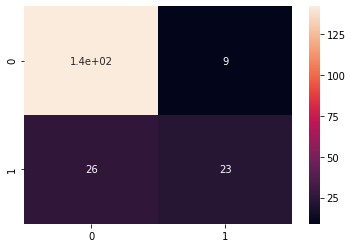

In [64]:
y_pred_ef = ebm.predict(X_test)

print("Training Accuracy: ", ebm.score(X_train, y_train))
print('Testing Accuarcy: ', ebm.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_ef,target_names=['non-fraud','fraud'])
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True)

--------------------------------------------------------------------------

### Step 11. Logging results into Azure Machine Learning Workspace

#### Connecting to Workspace and choose logging options

If you want to track or monitor your experiment, you must add code to start logging when you submit the run. The following are ways to trigger the run submission:

- **Run.start_logging** - Add logging functions to your training script and start an interactive logging session in the specified experiment. **start_logging** creates an interactive run for use in scenarios such as notebooks. Any metrics that are logged during the session are added to the run record in the experiment.
- **ScriptRunConfig** - Add logging functions to your training script and load the entire script folder with the run. **ScriptRunConfig** is a class for setting up configurations for script runs. With this option, you can add monitoring code to be notified of completion or to get a visual widget to monitor.
- **Designer logging** - Add logging functions to a drag-&-drop designer pipeline by using the **Execute Python Script** module. Add Python code to log designer experiments.
- **AML AutoML** - When we use AutoML, it automatically creates an experiment and registers all the important metrics.

You can find more information [Here.](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-track-experiments)

#### Step 11.1. Connecting to Workspace

In [65]:
import azureml.core
from azureml.core import Experiment, Workspace

# Check core SDK version number
print("You are currently using version", azureml.core.VERSION, "of the Azure ML SDK")
print("")

ws = Workspace(SUBSCRIPTION_ID, RESOURCE_GROUP, WORKSPACENAME)

You are currently using version 1.6.0 of the Azure ML SDK



#### Step 11.2. Generating Metrics

In [66]:
cr = classification_report(y_test,  y_pred_ef,target_names=['non-fraud','fraud'], output_dict =True)

In [67]:
# Non-Fraud
non_fraud_precision = cr['non-fraud']['precision']
non_fraud_recall = cr['non-fraud']['recall']
non_fraud_f1_score = cr['non-fraud']['f1-score']
non_fraud_support = cr['non-fraud']['support']

# Fraud
fraud_precision = cr['fraud']['precision']
fraud_recall = cr['fraud']['recall']
fraud_f1_score = cr['fraud']['f1-score']
fraud_support = cr['fraud']['support']

# Macro Average
macro_precision = cr['macro avg']['precision']
macro_recall = cr['macro avg']['recall']
macro_f1_score = cr['macro avg']['f1-score']
macro_support = cr['macro avg']['support']

# Weighted Average
weighted_precision = cr['weighted avg']['precision']
weighted_recall = cr['weighted avg']['recall']
weighted_f1_score = cr['weighted avg']['f1-score']
weighted_support = cr['weighted avg']['support']

values_to_log = [non_fraud_precision, non_fraud_recall, non_fraud_f1_score,non_fraud_support, 
                 fraud_precision, fraud_recall,fraud_f1_score,fraud_support,
                macro_precision,macro_recall,macro_f1_score, macro_support,
                weighted_precision, weighted_recall, weighted_f1_score, weighted_support]

names_to_log = ['non_fraud_precision', 'non_fraud_recall', 'non_fraud_f1_score','non_fraud_support', 
                 'fraud_precision', 'fraud_recall','fraud_f1_score','fraud_support',
                'macro_precision','macro_recall','macro_f1_score', 'macro_support',
                'weighted_precision', 'weighted_recall', 'weighted_f1_score', 'weighted_support']

In [68]:
# Get an experiment object from Azure Machine Learning
experiment = Experiment(workspace=ws, name="train-within-notebook")

# Create a run object in the experiment
run =  experiment.start_logging()
# Log the algorithm parameter alpha to the run
for i in range(0,len(names_to_log)):
    run.log(names_to_log[i], values_to_log[i])

# Save the model to the outputs directory for capture
model_file_name = 'outputs/ebm.pkl'

joblib.dump(value = ebm, filename = model_file_name)

# upload the model file explicitly into artifacts 
run.upload_file(name = model_file_name, path_or_stream = model_file_name)

# Complete the run
run.complete()

### Step 12: Feature Engineering

Now that we created that **baseline model** and analyzed the initial information provided. We are going to work on ways to improve upon this **baseline model**. To do this, we are going to work in two processes:

- **Feature engineering**: The process of creating new features from raw data to increase the predictive power of the learning algorithm. Engineered features should capture additional information that is not easily apparent in the original feature set.
- **Feature selection**: The process of selecting the key subset of features to reduce the dimensionality of the training problem.

Normally feature engineering is applied first to generate additional features, and then feature selection is done to eliminate irrelevant, redundant, or highly correlated features.

Feature engineering and selection are part of the **Model Creation** stage.

### What is feature engineering?

Training data consists of a matrix composed of rows and columns. Each row in the matrix is an observation or record. The columns of each row are the features that describe each record. The features specified in the experimental design should characterize the patterns in the data.

Although many of the raw data fields can be used directly to train a model, it's often necessary to create additional (engineered) features for an enhanced training dataset.

Engineered featured that enhance training provide information that better differentiates the patterns in the data. But this process is something of an art. Sound and productive decisions often require domain expertise.

[source](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/create-features)


#### Step 12.1. Recap from Data Profiling

In the **Data Profiling** step, we identify the following characteristics to take into account:

- **policy_bind_date** has too many different values: Each year has 365 days, thus we might want to find a different way to capture this field.
- **incident_date** has too many different values: Each year has 365 days, thus we might want to find a different way to capture this field.
- **age_months_as_customer** and **age** are highly correlated: this can be cause because there is a minimum age to request a driver's license.
- **vehicle_claim** and **total_claim_ammount** are highly correlated: this happens because there is a good proportion of accidents that do not involve other amounts such as **property_claim**.
- **auto_model** is highly correlated to **auto_make**: this makes sense, as we are working only with a limited subset of the data and we do not have the full population of the possible vehicles file for claims after an accident. In order to help the model generalize we might want to recode this variable and create something such as cost of vehicle (or price range) or limit the implementation of the model to the ones in this dataset.
- **policy_number** is unique, always has unique values: there is nothing we can do here, we might want to take it out as this will not provide any additional information.
- **auto_model** and **auto_make** are highly correlated: it makes sense as car manufacturers typically name their cars differently. We might want to keep them for now just in case we want to recode them and use the new features in our Machine Learning Model.
- We have a limited number of unique values **auto_model**: we do not have the full population of the possible vehicles file for claims after an accident. In order to help the model generalize we might want to recode this variable and create something such as cost of vehicle (or price range) or limit the implementation of the model to the ones in this dataset.
- We have a limited number of **auto_make** (manufacturers): same comment as in **auto_model**, we might want to remove it after we create the recoded new variable/s.
- **police_report_available** has **35% of values as "?"**: in this case, we will need to go back to the business and understand why this is happens in order to strategize a way to recode this variable.
- **property_damage** has around **36% if values as "?"**: in this case, we will need to go back to the business and understand why this is happens in order to strategize a way to recode this variable.
- **collision_type** has a around **18% of the values as "?"**: in this case, we will need to go back to the business and understand why this is happens in order to strategize a way to recode this variable.
- **incident_location** is too granular to provide any information: having the exact information where the accident happened might not be helpful in this subset of the data. Probably if we have more information, we can identify any trend base on this granularity level of location.
- **auto_year**: we might not have enough information to make any conclusions from this variable. 
- **total_claim_amount** has a Bimodal distribution: we might want to split it into two variables. 

#### Step 12.2. Removing high cardinality features

These features are not going to help the models, they are too specific. If we use them, the model might overfit the training data.

In [69]:
high_cardinality = ['policy_bind_date', 'policy_number','incident_location', 'insured_zip']

In [70]:
df = df.drop(columns=high_cardinality, errors='ignore')

#### Step 12.3. Translating dates into months and days

Full dates are too granular, but we might find some trends if we transform them into months and days

In [71]:
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year
df['incident_day'] = df['incident_date'].dt.day
df = df.drop(columns=['incident_date'])

#### Step 12.4. auto_model

Our dataset does not contain all the information about the overall population of cars. If we use this variable, we might overfit to the training data.

In order to help the model generalize we might want to recode this variable and create something such as cost of vehicle (or price range) or limit the implementation of the model to the ones in this dataset.

In our case, we did some additional research and gathered the auto_model pricing data, we will use this as a proxy to determine segment of car.

In [72]:
cprice = pd.read_csv("car_price.csv")

In [73]:
df = df.merge(cprice,how='left')

#### Step 12.5. total_claim_amount
We created a variable that specifies whenever the total_claim_amount belongs to any of the two distributions. Now we are going to create two separate variables.

In [74]:
df['total_claim_amount_less_15k'] = df['total_claim_amount_15k']*df['total_claim_amount']
df['total_claim_amount_more_15k'] = df['total_claim_amount']-df['total_claim_amount_less_15k']

#### Step 12.5. extreme values for total_claim_amount

We are not going to use this variable in the model, but we will measure the performance for that it.

In [75]:
ev_total_claim_amount = ['total_claim_amount_2_5_std', 'total_claim_amount_3_5_std']

#### Step 12.6. Anomaly datapoints detected

We are not going to use this variable in the model, but we will measure the performance for that it.

In [76]:
anomalies = ['hdbscan_cluster']

#### Step 12.6. auto_year

This variable by itself might not provide all the information that we need. However, we might want to measure car age.

In [77]:
df['car_age'] = df['incident_year'] - df['auto_year']

#### Step 12.6. incident_year

For now, we might as well remove the incident_year variable.

In [78]:
df = df.drop(columns=['incident_year'], errors='ignore')

#### Step 12.7. incident_state

Since we only have information about 3 states, we do not recommend using that variable in the model. The main reason is this might not be able to generalize into other states. Rather, we are going to create a marking whether the accident happened in the same state where the insured lives.

In [79]:
df['same_state'] = [i*1  for i in (df['policy_state'] == df['incident_state'])]

Additionally, we are going to calculate the distance between different states.

In [80]:
sdistance = pd.read_csv("state_distances.csv")

In [81]:
df = df.merge(sdistance,how='left')

#### Step 12.8. Reviewing possible impact of newly created features

Lets visualize the behavior of the new features that we created.

In [82]:
#features_ignore_initial = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'insured_zip', 'auto_model', 'fraud_reported']
X = df.drop(features_ignore_initial, errors = 'ignore', axis=1)
y = df[target_variable].values

from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X, y, name = 'Train Data')
show(hist)

### Step 13: Feature Selection

### About feature selection

In **Machine Learning** and statistics, **Feature Selection** is the process of selecting a **subset of relevant, useful features to use in building an analytical model**. Feature selection helps narrow the field of data to the most valuable inputs. Narrowing the field of data helps reduce noise and improve training performance.

Often, features are created from raw data through a process of **Feature Engineering**. For example, a time stamp in itself might not be useful for modeling until the information is transformed into units of days, months, or categories that are relevant to the problem, such as holiday versus working day.

New users of **Machine Learning** might be tempted to include all data that's available. They might expect that the algorithm will find something interesting by using more data. However, feature selection can usually improve your model, and prevent common problems:

* The data contains **redundant or irrelevant features**, which provide no more information than the currently selected features.
* The data contains **irrelevant features** that provide no useful information in any context. Including irrelevant fields not only increases the time required to train the data, but also can lead to poor results.
* With some algorithms, having **duplicate information** in the training data can lead to a phenomenon called **multicollinearity. In multicollinearity**, the presence of two highly correlated variables can cause the calculations for other variables to become much less accurate.

More information [Here.](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/feature-selection-modules)

**NOTE** There are seemly infinite ways on how to do **Feature Selection**; However, we decided for this workshop, we are going to focus on one of them. Using an **all-relevant tree-based** approach. 

#### Step 13.1: Additional features

In [83]:
df['distance_meters'] = df['distance_meters'].astype(int)
df['incident_month'] = df['incident_month'].astype('category')
df['incident_day'] = df['incident_day'].astype('category')

#### Step 13.2: Using Boruta for Feature selection

Boruta is an all-relevant feature selection method, invented by [Witold R. Rudnicki](https://www.icm.edu.pl/~rudnicki/) and developed by Miron B. Kursa at the [ICM UW](https://icm.edu.pl/).

It is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error. [Here is a paper with the details.](http://jmlr.csail.mit.edu/papers/volume8/nilsson07a/nilsson07a.pdf)

[Paper on original Boruta implementation.](https://www.jstatsoft.org/index.php/jss/article/view/v036i11/v36i11.pdf)

In [84]:
df2 = df.drop(ev_total_claim_amount+anomalies+high_cardinality+['incident_state'],errors='ignore', axis = 1)
df2 = pd.get_dummies(df2)
X1 = df2.drop(target_variable, axis=1)
X = df2.drop(target_variable, axis=1).values
y = df2[target_variable].values

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 47 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type                 1000 non-null object
incident_severity              1000 non-null object
authorities_con

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=3)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	219
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	201
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	201
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	201
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	201
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	201
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	202
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	202
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	202
Iteration: 	16 / 100
Confirmed: 	11
Tenta

In [87]:
X1.columns[feat_selector.support_weak_ + feat_selector.support_]

Index(['total_claim_amount', 'property_claim', 'vehicle_claim', 'max_msrp',
       'total_claim_amount_less_15k', 'total_claim_amount_more_15k',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'collision_type_?', 'incident_severity_Major Damage',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss'],
      dtype='object')

In [88]:
final_features = X1.columns[feat_selector.support_weak_ + feat_selector.support_]
final_features = list(final_features)+['insured_sex_FEMALE']

### Step 14: Model after feature selection

After **Feature Selection** and **Feature Engineering**, we need to identify what is the best [algorithm](https://en.wikipedia.org/wiki/Machine_learning#Types_of_learning_algorithms) and set of [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) that match. To do this, a common practice is to use **cross-validation**:


- **Train, Validation, and Test**: this consists on splitting the data in three datasets, each one with their objective:
    - **Training Dataset**: this is the data where the model is going to be trained on.
    - **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration. This is used to **Tune Hyperparameters**.
    - **Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. This is used to **Compare** different models after the **Hyperparameters have been chosen**.
    - **More information on this approach**: [Here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7#:~:text=All%20in%20all%2C%20like%20many%20other%20things%20in,their%20dataset%20into%202%20%E2%80%94%20Train%20and%20Test)

- **K-fold Cross-Validation**: this approach typically splits the data into two subsets: **training and testing**. This the process is executed as follows:
    - **Training**: here, a Resampling procedure is used to create **K** number of datasets from the original dataset. Then **K** models are created and their performance is averaged.
    - **Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. This is used to **Compare** different models after the **Hyperparameters have been chosen**.
    - **More Information about K-fold**: [Here](https://machinelearningmastery.com/k-fold-cross-validation/)

    
![](https://i.imgur.com/9k60cVA.png)
    
    
   

[More information on Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

[Video about Accuracy, reliability, model cross-validation and p-values](https://channel9.msdn.com/events/Ignite/Microsoft-Ignite-Orlando-2017/BRK3290?term=cross%20validation&lang-en=true)

We are going to start by creating a simple model and testing the features selected.

WARNING - Passing a numpy array to schema autogen when it should be dataframe.


Training Accuracy:  0.8825
Testing Accuarcy:  0.84
---------------------------------------------------------------
              precision    recall  f1-score   support

   non-fraud       0.87      0.93      0.90       151
       fraud       0.73      0.55      0.63        49

   micro avg       0.84      0.84      0.84       200
   macro avg       0.80      0.74      0.76       200
weighted avg       0.83      0.84      0.83       200



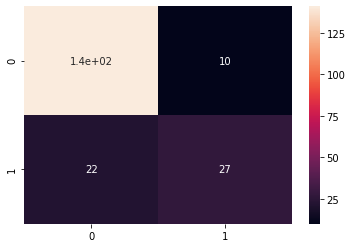

In [89]:
# Splitting into Train and testing
t_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X1[final_features], y, test_size=t_size, random_state=19, stratify=y)

# Defining EBM and predicting results
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)
y_pred_ef = ebm.predict(X_test)

# Generating Accuracy Metrics:
print("Training Accuracy: ", ebm.score(X_train, y_train))
print('Testing Accuarcy: ', ebm.score(X_test, y_test))
print('---------------------------------------------------------------')

# Making a classification report
cr = classification_report(y_test,  y_pred_ef,target_names=['non-fraud','fraud'])
print(cr)

# Making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True)

In [90]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [91]:
ebm_local = ebm.explain_local(X_test, y_test, name='EBM')
show(ebm_local)

### Step 15: Model with AutoML

Now that we have a proof that the features selected perform better in **testing** than the original subset of variables, recommend to continue working on additional models in order to find the "optimal" set of hyperparameters.

In order to help us in this process, we are going to use **Azure AutoML**: [More information here.](https://docs.microsoft.com/en-us/azure/machine-learning/concept-automated-ml)

![](https://docs.microsoft.com/en-us/azure/machine-learning/media/concept-automated-ml/automl-concept-diagram2.png)

In [92]:
from azureml.train.automl import AutoMLConfig

ensemble_settings = {}
automl_classifier = AutoMLConfig(
        task='classification',
        primary_metric='norm_macro_recall',
        iterations = 30,
        experiment_timeout_minutes=30,
        X=X_train,
        y = y_train,
        n_cross_validations=10
        )

WARNING - The AutoMLConfig parameters, X and y, will soon be deprecated. Please refer to our documentation for the latest interface: https://aka.ms/AutoMLConfig


In [93]:
#ws = Workspace.from_config()
#experiment = Experiment(ws, "forecasting_example")

run = experiment.submit(automl_classifier, show_output=True)
best_run, fitted_model = run.get_output()

Running on local machine
Parent Run ID: AutoML_af2b554c-e455-46be-9d2e-5c20ec568936

Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in

In [112]:
run

Run(Experiment: train-within-notebook,
Id: AutoML_af2b554c-e455-46be-9d2e-5c20ec568936,
Type: automl,
Status: Completed)

Training Accuracy:  0.8475
Testing Accuarcy:  0.875
---------------------------------------------------------------
              precision    recall  f1-score   support

   non-fraud       0.97      0.86      0.91       151
       fraud       0.68      0.92      0.78        49

   micro avg       0.88      0.88      0.88       200
   macro avg       0.83      0.89      0.85       200
weighted avg       0.90      0.88      0.88       200



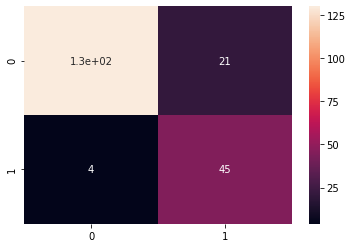

In [94]:
y_pred_ef = fitted_model.predict(X_test)

print("Training Accuracy: ", fitted_model.score(X_train, y_train))
print('Testing Accuarcy: ', fitted_model.score(X_test, y_test))
print('---------------------------------------------------------------')

# making a classification report
cr = classification_report(y_test,  y_pred_ef,target_names=['non-fraud','fraud'])
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True)

### Step 16: Performance on Subsets of data.

Here we are going to analyze the performance of the model in the different subsets and subpopulations of the data. That including:

- Extreme Values.
- Outliers that came out of PCA.
- Subpopulations

In [95]:
df['predicted'] = fitted_model.predict(df2[final_features])

In [96]:
df['correct_prediction'] = [i*1 for i in df['predicted'] == df['fraud_reported']]

In [97]:
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(df.drop(columns = 'correct_prediction'), df['correct_prediction'], name = 'Train Data')
show(hist)

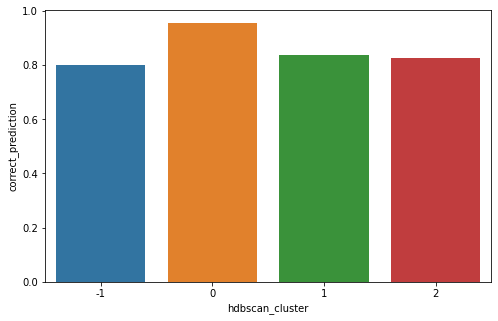

In [98]:
plt.figure(figsize=(8,5))
temp = df[['hdbscan_cluster','correct_prediction']].groupby(['hdbscan_cluster'], as_index = False).mean().sort_values(
    by = 'correct_prediction', ascending = False)
ax = sns.barplot(x='hdbscan_cluster',  y = 'correct_prediction', data=temp)

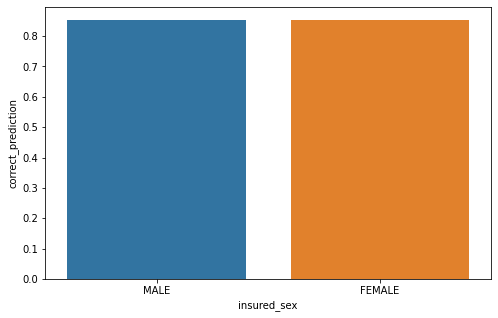

In [99]:
plt.figure(figsize=(8,5))
temp = df[['insured_sex','correct_prediction']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'correct_prediction', ascending = False)
ax = sns.barplot(x='insured_sex',  y = 'correct_prediction', data=temp)

### Steps 17: Fairness

In [100]:
sex = df['insured_sex']
y_true = df['fraud_reported']
y_pred = df['predicted']

from fairlearn.widget import FairlearnDashboard
FairlearnDashboard(sensitive_features=sex,
                   sensitive_feature_names=['insured_sex'],
                   y_true=y_true,
                   y_pred={"initial model": y_pred}) 

FairlearnWidget(value={'true_y': [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1…

In [101]:
best_run

Run(Experiment: train-within-notebook,
Id: AutoML_af2b554c-e455-46be-9d2e-5c20ec568936_29,
Type: None,
Status: Completed)

### Steps 18: Final limitations before deployment

- We have a limited number of different **auto_model**. We recommend reviewing the model performance for other car models before implementing the results to those cases.
- We have a limited number of different **auto_make**: We recommend reviewing the model performance for other car models before implementing the results to those cases.
- In this model, we only have 3 different **insured_state**: We recommend reviewing the model performance in other states, just to make sure that the performance is not going to be different in different locations.
- We identified observations for that very similar characteristics that had different **labels**, we recommend identifying new features for future iterations.


---------------------------------------------

### Steps 19: Model Deployment

In many cases, Machine Learning models need to be made available, so that other people, applications, or processes can use them. today, we are going to cover the process to make them available **Web Services**, and we are going do show you to do it in the **Azure** cloud.

In order to do this, you only have to execute four steps and the workflow is similar no matter [where you deploy](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where#target) your model:

- Register the model.
- Prepare to deploy. (Specify assets, usage, compute target.)
- Deploy the model to the compute target.
- Test the deployed model, also called a web service.

For more information on the concepts involved in the deployment workflow, see [Manage, deploy, and monitor models with Azure Machine Learning.](https://docs.microsoft.com/en-us/answers/products/)

#### Step 19.1: Register the model

A registered model is a logical container for one or more files that make up your model. For example, if you have a model that's stored in multiple files, you can register them as a single model in the workspace. After you register the files, you can then download or deploy the registered model and receive all the files that you registered.

You can register models that are either located in:
- Your **Azure Machine Learning Workspace**: like the **EBM** that logged in **Step 11** and the model from **AutoML** that we created in **Step 15**.
- Your **Local File system**: You can register a model by providing the local path of the model. You can provide the path of either a folder or a single file. You can use this method to register models trained with Azure Machine Learning and then downloaded. You can also use this method to register models trained outside of Azure Machine Learning. 


More information [Here.](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-and-where#target)

In our model, we are going to register the model that we created using **AutoML**.

In [102]:
from azureml.core import Workspace, Datastore, Dataset

In [103]:
df2[final_features+['fraud_reported']].head()

total_claim_amount  property_claim  vehicle_claim  max_msrp  \
0               71610           13020          52080  26950.00   
1                5070             780           3510  75000.00   
2               34650            3850          23100  57515.00   
3               63400            6340          50720  72600.00   
4                6500             650           4550  39275.00   

   total_claim_amount_less_15k  total_claim_amount_more_15k  \
0                            0                        71610   
1                         5070                            0   
2                            0                        34650   
3                            0                        63400   
4                         6500                            0   

   insured_hobbies_chess  insured_hobbies_cross-fit  collision_type_?  \
0                      0                          0                 0   
1                      0                          0                 1   
2                      0                          0                 0   
3                      0                          0                 0   
4                      0                          0                 1   

   incident_severity_Major Damage  incident_severity_Minor Damage  \
0                               1                               0   
1                               0                               1   
2                               0                               1   
3                               1                               0   
4                               0                               1   

   incident_severity_Total Loss  insured_sex_FEMALE  fraud_reported  
0                             0                   0               1  
1                             0                   0               1  
2                             0                   1               0  
3                             0                   1               1  
4                             0                   0               0

In our model, we are going to register the model that we created using **AutoML**.

In [104]:
description = 'My AutoML Model'
model = run.register_model(description = description,
                           tags={'dataset': 'mnist'})

print(run.model_id)

AutoMLaf2b554ce29


#### Step 19.2: Prepare to deploy

To deploy the model as a service, you need the following components:

- **Define inference environment**. This environment encapsulates the dependencies required to run your model for inference.
- **Define scoring code**. This script accepts requests, scores the requests by using the model, and returns the results.
- **Define inference configuration**. The inference configuration specifies the environment configuration, entry script, and other components needed to run the model as a service.

Once you have the necessary components, you can profile the service that will be created as a result of deploying your model to understand its CPU and memory requirements.

**Step 19.2.1: Define inference environment**

An inference configuration describes how to set up the web-service containing your model. It's used later, when you deploy the model.

Example:
```
name: project_environment
dependencies:
  - python=3.6.2
  - scikit-learn=0.20.0
  - pip:
      # You must list azureml-defaults as a pip dependency
    - azureml-defaults>=1.0.45
    - inference-schema[numpy-support]
```
In our case, we are going to download the one generated by **AutoML**.

In [105]:
best_run.download_file('/outputs/conda_env_v_1_0_0.yml')

**Step 19.2.2: Define Scoring file**

The entry script receives data submitted to a deployed web service and passes it to the model. It then takes the response returned by the model and returns that to the client. The script is specific to your model. It must understand the data that the model expects and returns.

The script contains two functions that load and run the model:

- **init()**: Typically, this function loads the model into a global object. This function is run only once, when the Docker container for your web service is started.

- **run(input_data)**: This function uses the model to predict a value based on the input data. Inputs and outputs of the run typically use JSON for serialization and deserialization. You can also work with raw binary data. You can transform the data before sending it to the model or before returning it to the client.

In our case, we are going to download the one generated by **AutoML**.

In [106]:
best_run.download_file('/outputs/scoring_file_v_1_0_0.py')

**Step 19.2.3: Define inference configuration**

The inference configuration specifies the environment configuration, entry script, and other components needed to run the model as a service.

In [107]:
from azureml.core.environment import Environment
from azureml.core.model import InferenceConfig

myenv = Environment.from_conda_specification(name = 'myenv',
                                             file_path = 'conda_env_v_1_0_0.yml')
myenv.register(workspace=ws)

inference_config = InferenceConfig(entry_script='scoring_file_v_1_0_0.py',
                                   environment=myenv)

In [108]:
inference_config

InferenceConfig(entry_script=scoring_file_v_1_0_0.py, runtime=None, conda_file=None, extra_docker_file_steps=None, source_directory=None, enable_gpu=None, base_image=None, base_image_registry=<azureml.core.container_registry.ContainerRegistry object at 0x7fa00a3d06d8>)

### Step 20. Testing local deployment

Before deploying to the cloud, we recommend testing the image created in your local compute. For this we will use the **LocalWebservice**.

More information [here](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-troubleshoot-deployment)

In [110]:
from azureml.core.webservice import AciWebservice, AksWebservice, LocalWebservice
from azureml.core.model import Model


deployment_config = LocalWebservice.deploy_configuration(port=8890)
service = Model.deploy(ws, "myservice", [model], inference_config, deployment_config, overwrite=True)
service.wait_for_deployment(show_output = True)
print(service.state)

Generating Docker build context.
Package creation Succeeded
Logging into Docker registry dsworkshopwoc74a6fdc.azurecr.io
Logging into Docker registry dsworkshopwoc74a6fdc.azurecr.io
Building Docker image from Dockerfile...
Step 1/5 : FROM dsworkshopwoc74a6fdc.azurecr.io/azureml/azureml_c5620d7d4dd31f6a28a4e87867e65dcc
 ---> e23a19b32324
Step 2/5 : COPY azureml-app /var/azureml-app
 ---> 201ede8d2acc
Step 3/5 : RUN mkdir -p '/var/azureml-app' && echo eyJhY2NvdW50Q29udGV4dCI6eyJzdWJzY3JpcHRpb25JZCI6Ijk3ZWY0OTc0LWIxMzktNDU3YS05MzE0LWE5ZDU2NDBhYzNkOSIsInJlc291cmNlR3JvdXBOYW1lIjoiZHNfd29ya3Nob3AiLCJhY2NvdW50TmFtZSI6ImRzX3dvcmtzaG9wX3dvcmtzcGFjZSIsIndvcmtzcGFjZUlkIjoiZDFjYzZiMWItYWZkYi00NGE0LWExNjQtOWFmODlkZDQ4NGQ2In0sIm1vZGVscyI6e30sIm1vZGVsc0luZm8iOnt9fQ== | base64 --decode > /var/azureml-app/model_config_map.json
 ---> Running in e33024eedfae
 ---> 77eb788542be
Step 4/5 : RUN mv '/var/azureml-app/tmpbbzygxtz.py' /var/azureml-app/main.py
 ---> Running in 8b3e291a58eb
 ---> bae9fe88a798
Ste

In [114]:
import json
import numpy as np

uri = service.scoring_uri
print(uri)
print("--------------------------------------------------------------------------")
test_sample = json.dumps({"data":np.array(df2[final_features]).tolist()})

prediction = service.run(input_data=test_sample)
print(prediction)

http://localhost:8890/score
--------------------------------------------------------------------------
{"result": [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 

### Step 21. Deploy to compute target

There are several deployment scenarios:

- [Azure ML compute instances](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-local-container-notebook-vm)
- [Azure Kubernetes Service](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-azure-kubernetes-service)
- [Azure Container Instances](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-azure-container-instance)
- [GPU inference](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-inferencing-gpus)
- [Azure App Service](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-app-service)
- [Azure Functions](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-functions)
- [Azure Cognitive Search](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-model-cognitive-search)
- [Azure IoT Edge devices](https://docs.microsoft.com/en-us/azure/iot-edge/tutorial-deploy-machine-learning?context=azure/machine-learning/context/ml-context)
- [FPGA inference](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-fpga-web-service)
- [Custom Docker images](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-custom-docker-image)
- [Non-Azure ML models](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-existing-model)

For this example, we are going to deploy the model to an **Azure Kubernetes Service.**

But before that, we need to execute some preparation tasks.

#### Step 21.1. Create compute target
Time estimate: Approximately 20 minutes.

In [115]:
from azureml.core.compute import AksCompute, ComputeTarget
# Set the resource group that contains the AKS cluster and the cluster name
resource_group = RESOURCE_GROUP
cluster_name = 'dsworkshop'

try:
    aks_target = ws.compute_targets[cluster_name]
except:
    # Use the default configuration (you can also provide parameters to customize this).
    # For example, to create a dev/test cluster, use:
    # prov_config = AksCompute.provisioning_configuration(cluster_purpose = AksCompute.ClusterPurpose.DEV_TEST)
    # For general cases, use AksCompute.provisioning_configuration()
    prov_config = AksCompute.provisioning_configuration(cluster_purpose = AksCompute.ClusterPurpose.DEV_TEST)

    aks_name = cluster_name
    # Create the cluster
    aks_target = ComputeTarget.create(workspace = ws,
                                        name = aks_name,
                                        provisioning_configuration = prov_config)

    # Wait for the create process to complete
    aks_target.wait_for_completion(show_output = True)

#### Step 21.2. Deploy to compute target

In [116]:
service_name = 'myservice'
deployment_config = AksWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1)
service = Model.deploy(ws, service_name, [model], inference_config, deployment_config, aks_target,overwrite=True)
service.wait_for_deployment(show_output = True)
print(service.state)
print(service.get_logs())

Running.......
Succeeded
AKS service creation operation finished, operation "Succeeded"
Healthy
2020-06-28T16:59:55,029456081+00:00 - gunicorn/run 
2020-06-28T16:59:55,031412151+00:00 - iot-server/run 
2020-06-28T16:59:55,030689888+00:00 - rsyslog/run 
2020-06-28T16:59:55,031941097+00:00 - nginx/run 
/usr/sbin/nginx: /azureml-envs/azureml_e91006663105fb7a4188b2e2b644b9c3/lib/libcrypto.so.1.0.0: no version information available (required by /usr/sbin/nginx)
/usr/sbin/nginx: /azureml-envs/azureml_e91006663105fb7a4188b2e2b644b9c3/lib/libcrypto.so.1.0.0: no version information available (required by /usr/sbin/nginx)
/usr/sbin/nginx: /azureml-envs/azureml_e91006663105fb7a4188b2e2b644b9c3/lib/libssl.so.1.0.0: no version information available (required by /usr/sbin/nginx)
/usr/sbin/nginx: /azureml-envs/azureml_e91006663105fb7a4188b2e2b644b9c3/lib/libssl.so.1.0.0: no version information available (required by /usr/sbin/nginx)
/usr/sbin/nginx: /azureml-envs/azureml_e91006663105fb7a4188b2e2b644b

#### Step 21.3. Testing Results

Documentation on [Calling service endopints.](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-consume-web-service)

In [117]:
import requests
import json

# URL for the web service
scoring_uri = service.scoring_uri
# If the service is authenticated, set the key
key = service.get_keys()[0]

print("Scoring URI: ", "XXXXX")
print("Primary key: ", "XXXXX")

test_samples = json.dumps({"data":np.array(df2[final_features]).tolist()})

# Set the content type
headers = { 'Content-Type':'application/json' }
# If authentication is enabled, set the authorization header
headers['Authorization']=f'Bearer {key}'

# Make the request and display the response
resp = requests.post(scoring_uri,test_samples, headers = headers)
resp.json()

Scoring URI:  XXXXX
Primary key:  XXXXX


'{"result": [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 

- [A/B Testing with AKS](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-deploy-azure-kubernetes-service#deploy-models-to-aks-using-controlled-rollout-preview)  
- [Secure Web Service](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-secure-web-service)  
- [Collect data from deployed model](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-enable-data-collection)
- [Deploy an encrypted inferencing web service](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-homomorphic-encryption-seal)
- [Monitor and collect data from ML web service endpoints](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-enable-app-insights)

### Step 21. Monitor Data Drift

To configure data drift for your experiment, please use the following [example](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-monitor-data-drift)

### Step 22. More advanced topics

[Deploy Encrypted Inference](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-homomorphic-encryption-seal)
[Differencial Privacy](https://www.microsoft.com/en-us/research/publication/differential-privacy/)